In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
Housing = pd.read_csv('housing.csv')

In [3]:
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
train_set ,test_set = train_test_split(Housing, train_size=0.2 , random_state=28)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 2107 to 9473
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4083 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


<Axes: xlabel='longitude', ylabel='latitude'>

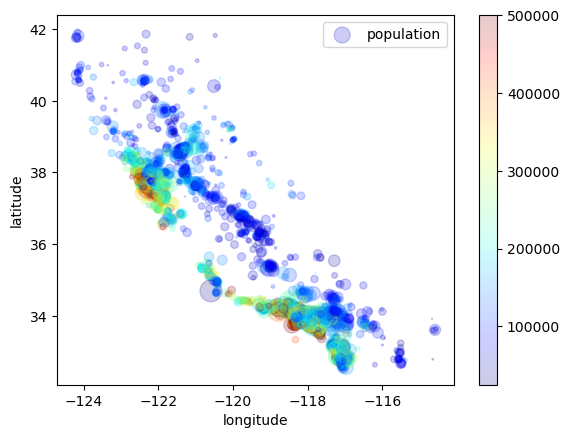

In [6]:
data = train_set.copy()
data.plot(kind="scatter",x="longitude" ,y="latitude",
         s=data["population"]/50 ,label="population",
         c=data["median_house_value"] ,cmap=plt.get_cmap("jet") , 
         alpha=0.2)

In [7]:
# satandard correlation coefficient
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\ariag\AppData\Local\Temp\ipykernel_17232\578595614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.682157
total_rooms           0.130645
housing_median_age    0.107533
households            0.058097
total_bedrooms        0.043211
population           -0.030588
longitude            -0.038259
latitude             -0.138862
Name: median_house_value, dtype: float64

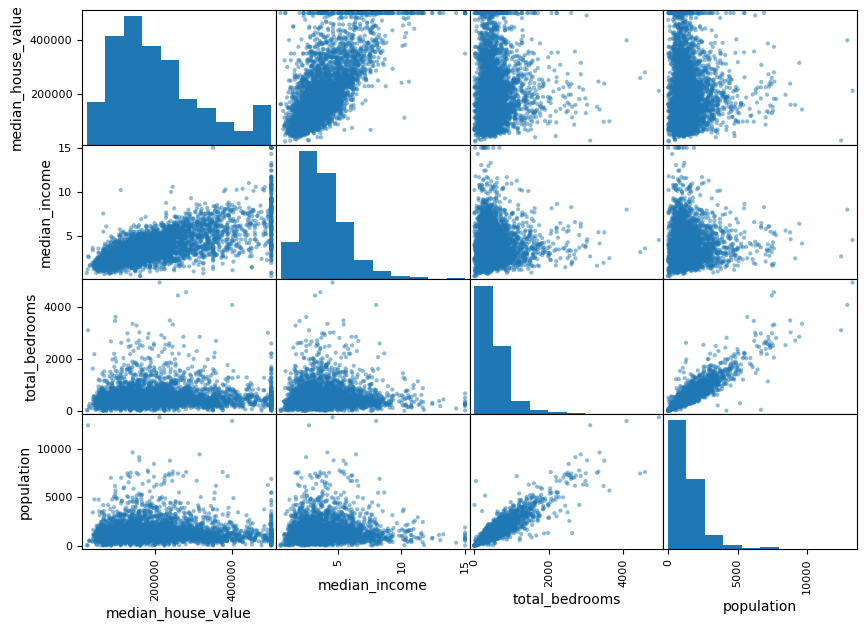

In [8]:
features = ["median_house_value","median_income","total_bedrooms","population"]
scatter_matrix(data[features] , figsize=(10,7))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

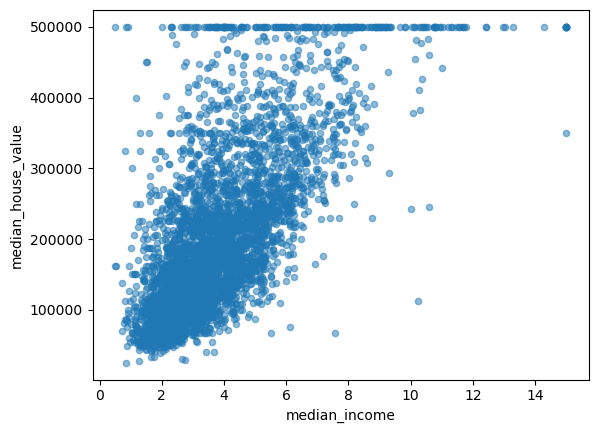

In [9]:
data.plot(kind="scatter",x="median_income" ,y="median_house_value", 
         alpha=0.5)

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2107,-119.74,36.74,39.0,4893.0,1210.0,4749.0,1067.0,1.2065,55600.0,INLAND
8924,-118.51,34.00,52.0,1241.0,502.0,679.0,459.0,2.3098,500001.0,<1H OCEAN
15108,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,166100.0,<1H OCEAN
13163,-121.38,36.85,13.0,4115.0,782.0,2903.0,747.0,3.7316,192400.0,INLAND
5865,-118.34,34.18,46.0,1393.0,301.0,714.0,295.0,2.8125,229900.0,<1H OCEAN


In [11]:
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]
data["total_rooms_per_population"] = data["total_rooms"]/data["population"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_per_total_rooms,population_per_households,total_rooms_per_population
2107,-119.74,36.74,39.0,4893.0,1210.0,4749.0,1067.0,1.2065,55600.0,INLAND,0.247292,4.450797,1.030322
8924,-118.51,34.00,52.0,1241.0,502.0,679.0,459.0,2.3098,500001.0,<1H OCEAN,0.404512,1.479303,1.827688
15108,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,166100.0,<1H OCEAN,0.184698,2.952729,1.853249
13163,-121.38,36.85,13.0,4115.0,782.0,2903.0,747.0,3.7316,192400.0,INLAND,0.190036,3.886212,1.417499
5865,-118.34,34.18,46.0,1393.0,301.0,714.0,295.0,2.8125,229900.0,<1H OCEAN,0.216080,2.420339,1.950980


In [12]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\ariag\AppData\Local\Temp\ipykernel_17232\3974275619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value                1.000000
median_income                     0.682157
total_rooms_per_population        0.212828
total_rooms                       0.130645
housing_median_age                0.107533
households                        0.058097
total_bedrooms                    0.043211
population                       -0.030588
longitude                        -0.038259
population_per_households        -0.039118
latitude                         -0.138862
total_bedrooms_per_total_rooms   -0.240057
Name: median_house_value, dtype: float64

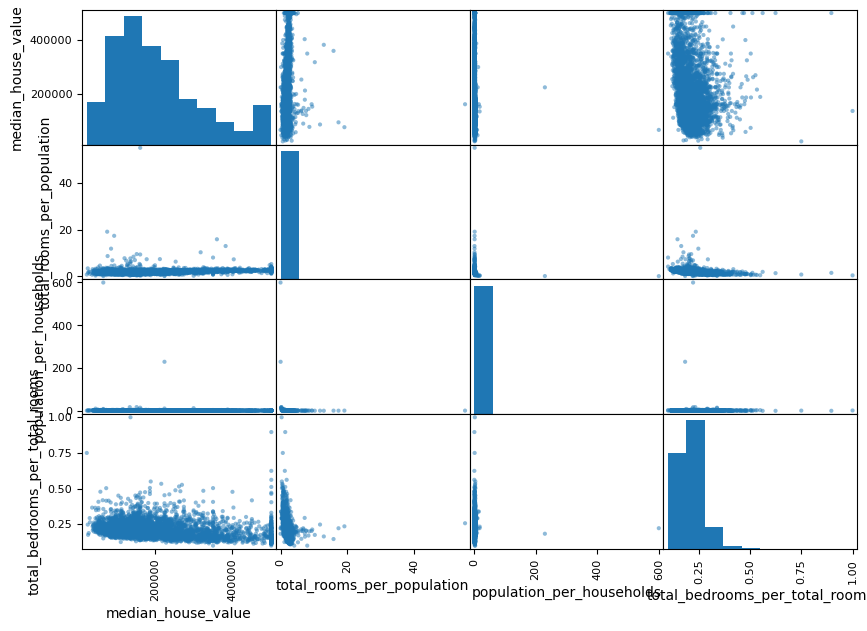

In [13]:
features = ["median_house_value","total_rooms_per_population","population_per_households","total_bedrooms_per_total_rooms"]
scatter_matrix(data[features] , figsize=(10,7))
plt.show()

In [14]:
#======================================Prepare The Data===================================

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)
df_num = df.drop("ocean_proximity", axis=1)

In [15]:
#======================================SimpelImputer====================================

imputer = SimpleImputer(missing_values=np.nan , strategy="median")
imputer.fit(df_num)
X = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(X ,columns=df_num.columns)

In [16]:
#=====================================Custom Transformers==============================

rooms_ix, bedrooms_ix, population_ix, household_ix =3, 4, 5, 6

class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self , X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix]/ X[:, household_ix]
        bedrooms_per_rooms = X[:, bedrooms_ix]/ X[:, rooms_ix]
        rooms_per_population = X[:, rooms_ix]/ X[:, population_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms, rooms_per_population]
    
custom =combinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append("room_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_rooms")
columns.append("rooms_per_population")
data_custom_tr.columns = columns
data_custom_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_rooms,rooms_per_population
0,-119.74,36.74,39.0,4893.0,1210.0,4749.0,1067.0,1.2065,4.585754,4.450797,0.247292,1.030322
1,-118.51,34.00,52.0,1241.0,502.0,679.0,459.0,2.3098,2.703704,1.479303,0.404512,1.827688
2,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,5.472144,2.952729,0.184698,1.853249
3,-121.38,36.85,13.0,4115.0,782.0,2903.0,747.0,3.7316,5.508701,3.886212,0.190036,1.417499
4,-118.34,34.18,46.0,1393.0,301.0,714.0,295.0,2.8125,4.722034,2.420339,0.216080,1.950980
5,-118.82,34.15,9.0,655.0,110.0,222.0,109.0,7.8528,6.009174,2.036697,0.167939,2.950450
6,-122.46,37.73,52.0,2401.0,346.0,812.0,328.0,6.8322,7.320122,2.475610,0.144107,2.956897
7,-117.00,32.70,23.0,2785.0,468.0,1456.0,449.0,4.3714,6.202673,3.242762,0.168043,1.912775
8,-122.25,38.05,30.0,1255.0,297.0,779.0,307.0,1.6767,4.087948,2.537459,0.236653,1.611040
9,-115.55,32.98,24.0,2565.0,530.0,1447.0,473.0,3.2593,5.422833,3.059197,0.206628,1.772633


In [17]:
#===============================Feature Scaling=======================

feature_scal =StandardScaler()
data_num_scaler_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns = data_custom_tr.columns)
data_num_scaler_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_rooms,rooms_per_population
0,-0.101481,0.546722,0.819295,1.024706,1.599802,3.008454,1.458081,-1.436703,-0.307215,0.131256,0.555205,-0.783262
1,0.509593,-0.743471,1.842537,-0.644620,-0.085740,-0.684733,-0.112780,-0.851563,-1.000090,-0.166573,3.125104,-0.115976
2,1.279646,-1.284976,-1.384611,3.232951,2.994897,3.460348,3.292475,0.135849,0.019108,-0.018893,-0.467953,-0.094584
3,-0.916246,0.598518,-1.227189,0.669083,0.580858,1.333363,0.631312,-0.097506,0.032566,0.074668,-0.380686,-0.459248
4,0.594050,-0.658714,1.370272,-0.575141,-0.564263,-0.652973,-0.536499,-0.584955,-0.257044,-0.072254,0.045024,-0.012797


In [18]:
#==============================One Hot Encoder========================

encoder = OneHotEncoder(sparse=False)
data_encoder_cat = pd.DataFrame(encoder.fit_transform(df[["ocean_proximity"]]))
data_encoder_cat.columns = encoder.categories_
data_encoder_cat.head()

C:\Users\ariag\miniconda3\envs\ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [19]:
final = pd.concat([data_num_scaler_tr, data_encoder_cat], axis=1)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_rooms,rooms_per_population,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-0.101481,0.546722,0.819295,1.024706,1.599802,3.008454,1.458081,-1.436703,-0.307215,0.131256,0.555205,-0.783262,0.0,1.0,0.0,0.0,0.0
1,0.509593,-0.743471,1.842537,-0.644620,-0.085740,-0.684733,-0.112780,-0.851563,-1.000090,-0.166573,3.125104,-0.115976,1.0,0.0,0.0,0.0,0.0
2,1.279646,-1.284976,-1.384611,3.232951,2.994897,3.460348,3.292475,0.135849,0.019108,-0.018893,-0.467953,-0.094584,1.0,0.0,0.0,0.0,0.0
3,-0.916246,0.598518,-1.227189,0.669083,0.580858,1.333363,0.631312,-0.097506,0.032566,0.074668,-0.380686,-0.459248,0.0,1.0,0.0,0.0,0.0
4,0.594050,-0.658714,1.370272,-0.575141,-0.564263,-0.652973,-0.536499,-0.584955,-0.257044,-0.072254,0.045024,-0.012797,1.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion


rooms_ix, bedrooms_ix, population_ix, household_ix =3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self , X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix]/ X[:, household_ix]
        bedrooms_per_rooms = X[:, bedrooms_ix]/ X[:, rooms_ix]
        rooms_per_population = X[:, rooms_ix]/ X[:, population_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms, rooms_per_population]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self , X):
        return X[self.attribute_names].values

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)

df_num = df.drop("ocean_proximity", axis=1)
num_attrs = list(df_num)
cat_attrs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('Selector', DataFrameSelector(num_attrs)),
    ('Imputer', SimpleImputer(missing_values=np.nan , strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])
 
housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=['longitude', 'latitude', 'housing_median_age',
                                                              'total_rooms', 'total_bedrooms', 'population',
                                                              'households', 'median_income', 'room_per_household',
                                                              'population_per_household', 'bedrooms_per_rooms',
                                                              'rooms_per_population','prox_<1H OCEAN', 'prox_INLAND',
                                                              'prox_ISLAND', 'prox_NEAR BAY', 'prox_NEAR OCEAN'])  

C:\Users\ariag\miniconda3\envs\ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_rooms,rooms_per_population,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.101481,0.546722,0.819295,1.024706,1.599802,3.008454,1.458081,-1.436703,-0.307215,0.131256,0.555205,-0.783262,0.0,1.0,0.0,0.0,0.0
1,0.509593,-0.743471,1.842537,-0.644620,-0.085740,-0.684733,-0.112780,-0.851563,-1.000090,-0.166573,3.125104,-0.115976,1.0,0.0,0.0,0.0,0.0
2,1.279646,-1.284976,-1.384611,3.232951,2.994897,3.460348,3.292475,0.135849,0.019108,-0.018893,-0.467953,-0.094584,1.0,0.0,0.0,0.0,0.0
3,-0.916246,0.598518,-1.227189,0.669083,0.580858,1.333363,0.631312,-0.097506,0.032566,0.074668,-0.380686,-0.459248,0.0,1.0,0.0,0.0,0.0
4,0.594050,-0.658714,1.370272,-0.575141,-0.564263,-0.652973,-0.536499,-0.584955,-0.257044,-0.072254,0.045024,-0.012797,1.0,0.0,0.0,0.0,0.0


In [30]:
def display_scores(scores, model_name):
    print("=============", model_name,"===========")
    print("Scores", scores)
    print("Mean: ",scores.mean())
    print("Standars devation: ",scores.std())

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_score = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
forest_rsme_score = np.sqrt(-forest_score)
display_scores(forest_rsme_score, "RandomForestRegressor")

============= RandomForestRegressor ===========
Scores [54842.43827175 51474.24203836 52493.48943301 49130.88243743
 54960.27917349 54930.12558567 59687.58299251 51854.88778689
 53802.02131782 57874.41174559]
Mean:  54105.03607825268
Standars devation:  2945.2393451857215
